<a href="https://colab.research.google.com/github/brunouserr/analytics_projects/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1C7fHqALXokyvZZZIn1aMkjyaDWXdAbIy

Downloading...
From: https://drive.google.com/uc?id=1C7fHqALXokyvZZZIn1aMkjyaDWXdAbIy
To: /content/auto-mpg.csv
100% 18.1k/18.1k [00:00<00:00, 36.4MB/s]


In [3]:
df= pd.read_csv("auto-mpg.csv")

# Предобработка данных

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Пропусков нет. Посмотрим, какие значения есть в каждом столбце

In [6]:
df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model year', 'origin']].describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


Есть несколько неизвестных значений лошадиных сил. Заполним их средними значениями у машин, с таким же количеством цилиндров

In [9]:
df.loc[df['horsepower'] == '?', 'horsepower'] = 0
df['horsepower'] = df['horsepower'].astype(int)
missing_ind = df[df['horsepower'] == 0].index

In [10]:
avg_horsepower_df = df.groupby('cylinders')['horsepower'].mean().astype(int)
avg_horsepower_cyl = dict(zip(avg_horsepower_df.index, avg_horsepower_df.values))

In [11]:
df.loc[missing_ind, 'horsepower'] = df.loc[missing_ind, 'cylinders'].map(avg_horsepower_cyl)

In [12]:
df.iloc[missing_ind]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,76,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,100,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,76,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,76,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,76,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,76,3035,20.5,82,1,amc concord dl


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [14]:
print(df.duplicated().sum())

0


Пропусков и дубликатов нет.

Типы данных:

Количественные непрерывные: mpg, displacement, acceleration, weight, horsepower  
Количественные дискретные: cylinders  
Порядковые: model_year  
Категориальные: origin, car_name  

# Распределение данных

## mpg

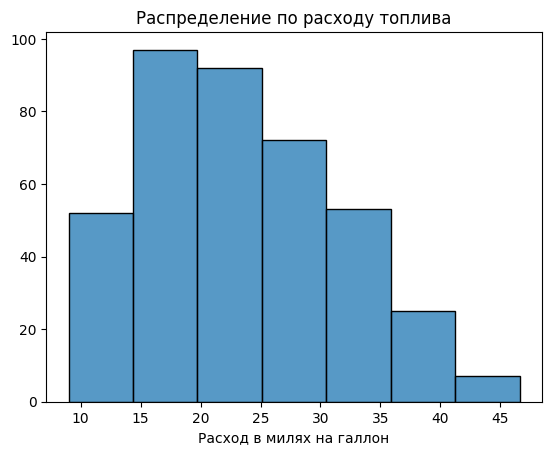

In [15]:
sns.histplot(df['mpg'], bins=7, kde=False)
plt.title('Распределение по расходу топлива')
plt.ylabel('')
plt.xlabel('Расход в милях на галлон')
plt.show()

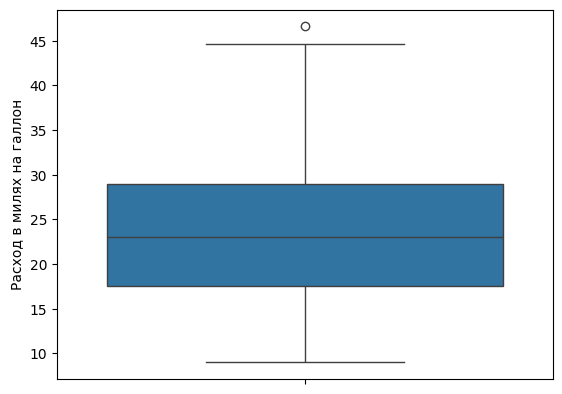

In [16]:
sns.boxplot(df['mpg'])
plt.ylabel('Расход в милях на галлон')
plt.show()

## cylinders


In [17]:
cylinders_count = df['cylinders'].value_counts()

In [18]:
cylinders_count_grouped = pd.concat([cylinders_count[:3], pd.Series([cylinders_count[3:].sum()], index=['3/5'])])

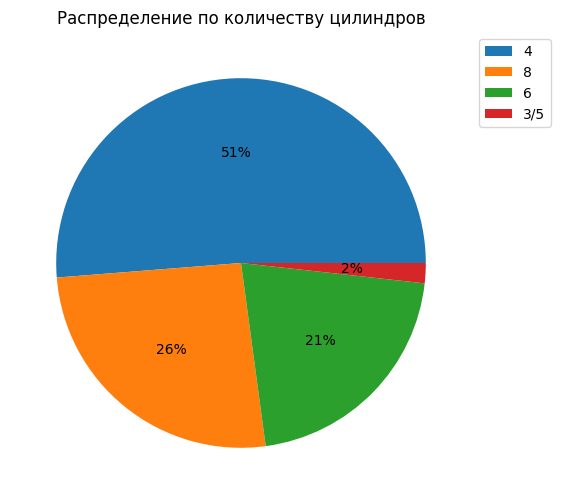

In [19]:
plt.figure(figsize=(6, 6))
plt.pie(cylinders_count_grouped, autopct='%1.0f%%')
plt.legend(loc='upper left',labels=cylinders_count_grouped.index, bbox_to_anchor=(1, 1))

plt.title("Распределение по количеству цилиндров")
plt.show()

## displacement

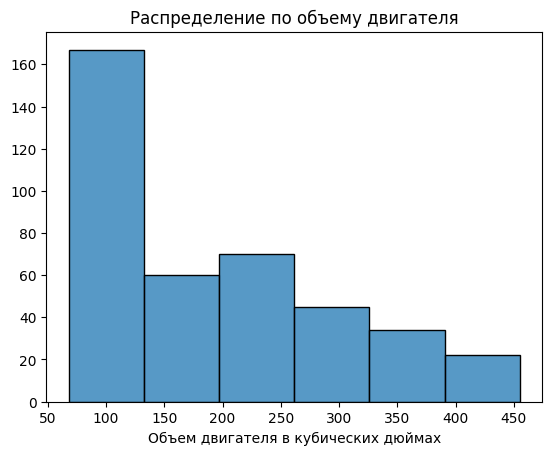

In [20]:
sns.histplot(df['displacement'], bins=6, kde=False)
plt.title('Распределение по объему двигателя')
plt.ylabel('')
plt.xlabel('Объем двигателя в кубических дюймах')
plt.show()

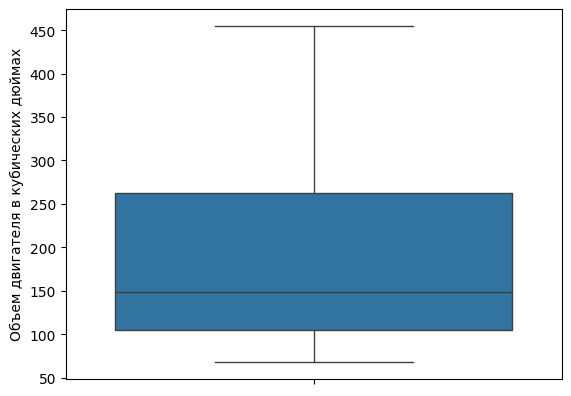

In [21]:
sns.boxplot(df['displacement'])
plt.ylabel('Объем двигателя в кубических дюймах')
plt.show()

## horsepower


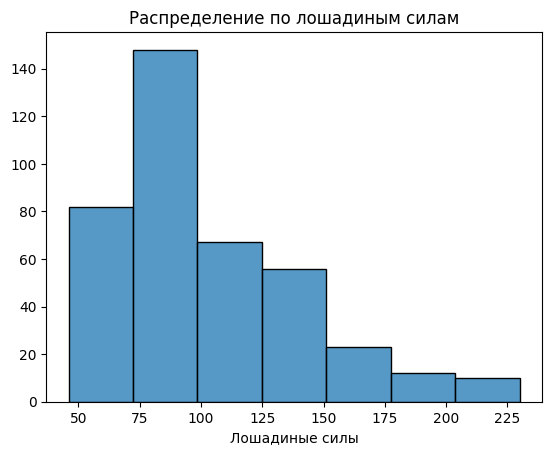

In [22]:
sns.histplot(df['horsepower'], bins=7, kde=False)
plt.title('Распределение по лошадиным силам')
plt.ylabel('')
plt.xlabel('Лошадиные силы')
plt.show()

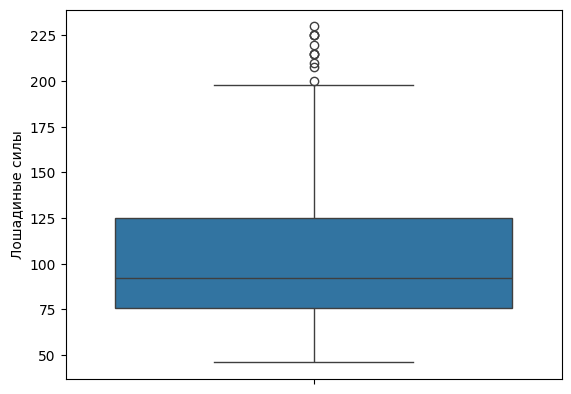

In [23]:
sns.boxplot(df['horsepower'])
plt.ylabel('Лошадиные силы')
plt.show()

## weight

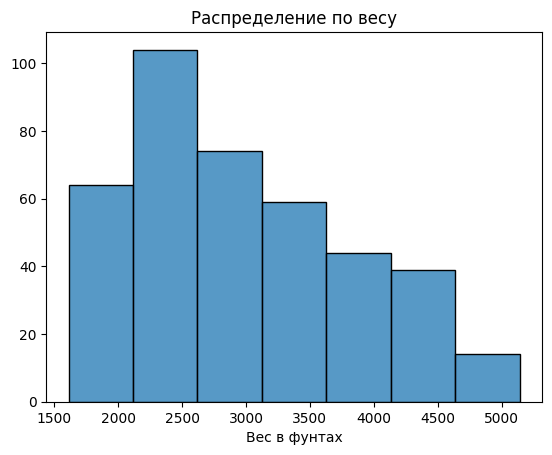

In [24]:
sns.histplot(df['weight'], bins=7, kde=False)
plt.title('Распределение по весу')
plt.ylabel('')
plt.xlabel('Вес в фунтах')
plt.show()

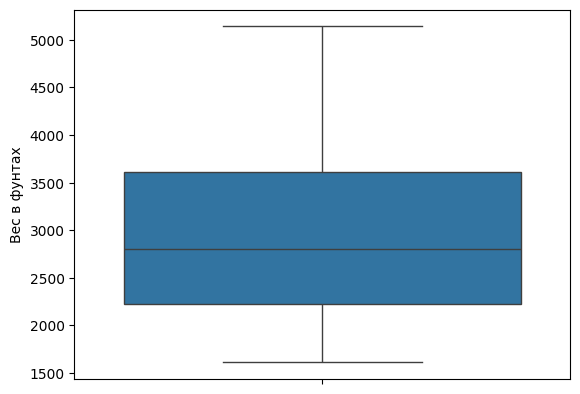

In [25]:
sns.boxplot(df['weight'])
plt.ylabel('Вес в фунтах')
plt.show()

## acceleration

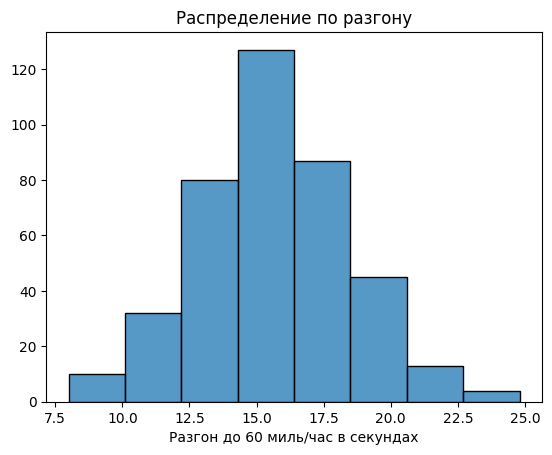

In [26]:
sns.histplot(df['acceleration'], bins=8, kde=False)
plt.title('Распределение по разгону')
plt.ylabel('')
plt.xlabel('Разгон до 60 миль/час в секундах')
plt.show()

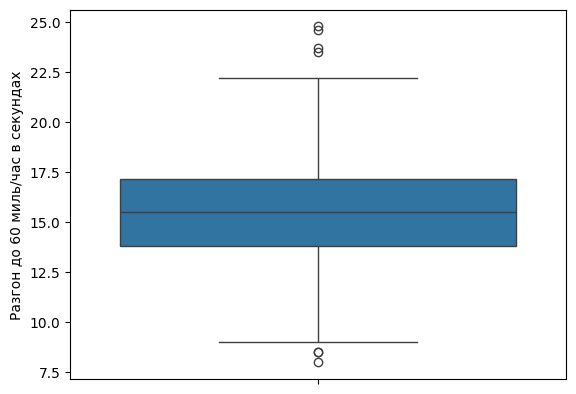

In [27]:
sns.boxplot(df['acceleration'])
plt.ylabel('Разгон до 60 миль/час в секундах')
plt.show()

## model year

In [28]:
model_years = df['model year'].value_counts().sort_index()

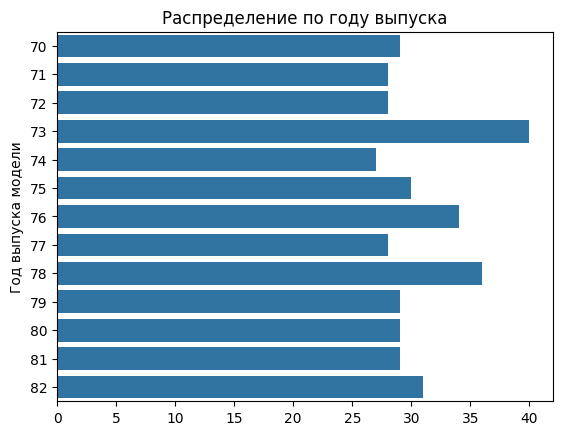

In [29]:
sns.barplot(x=model_years, y=model_years.index, orient='h')
plt.xlabel('')
plt.ylabel('Год выпуска модели')
plt.title('Распределение по году выпуска')
plt.show()

## origin

In [30]:
origin_count = df['origin'].value_counts()

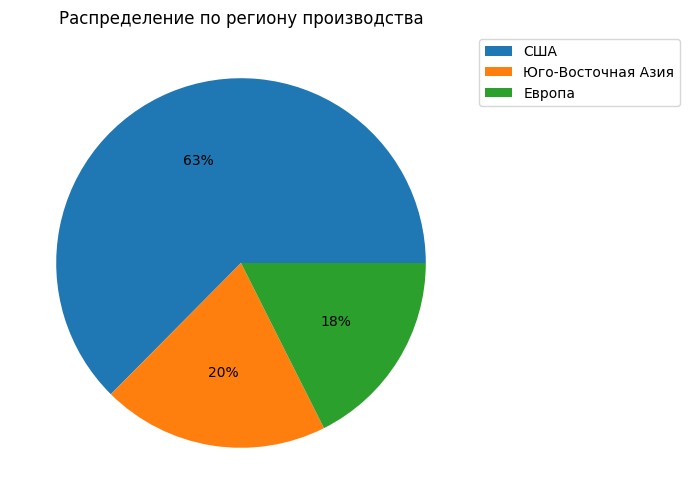

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(origin_count, autopct='%1.0f%%')
plt.legend(loc='upper left',labels=['США','Юго-Восточная Азия', 'Европа'], bbox_to_anchor=(1, 1))

plt.title("Распределение по региону производства")
plt.show()

## car name

Топ 5 машин по распространенности

In [32]:
df['car name'].value_counts()[:5]

,count
car name,
ford pinto,6
ford maverick,5
amc matador,5
toyota corolla,5
amc hornet,4


# Взаимосвязь признаков

Для проверки статистических гипотез, выберем уровень значимости 0.05

## Количественные и категориальные

### mpg/origin

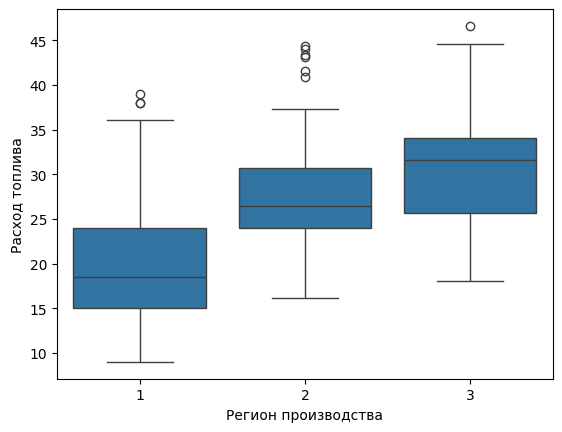

In [33]:
sns.boxplot(data=df, x='origin', y='mpg')
plt.xlabel('Регион производства')
plt.ylabel('Расход топлива')
plt.show()

Нулевая гипотеза: равенство медианных значений расхода для всех регионов производства

Проверим каждую выборку на нормальность с помощью критерия Шапиро-Уилка

In [34]:
for country in (1,2,3):
  print(stats.shapiro(df.loc[df['origin'] == country,'mpg']))

ShapiroResult(statistic=np.float64(0.937563872893234), pvalue=np.float64(8.646425886824745e-09))
ShapiroResult(statistic=np.float64(0.9512206584869289), pvalue=np.float64(0.008404655457678876))
ShapiroResult(statistic=np.float64(0.9797350230945931), pvalue=np.float64(0.24196747173744043))


Только третья выборка является нормальной, остальные - нет. 3 группы, независимые, поэтому применяем критерий Краскала-Уоллиса

In [35]:
stats.kruskal(df.loc[df['origin'] == 1,'mpg'],
              df.loc[df['origin'] == 2,'mpg'],
              df.loc[df['origin'] == 3,'mpg'])

KruskalResult(statistic=np.float64(134.45665866995384), pvalue=np.float64(6.354882752621894e-30))

Отвергаем нулевую гипотезу о равенстве медианных значений расхода

Проверим отдельно различия медиан у групп 2 и 3. Так как групп 2, то используем критерий Манна-Уитни

In [36]:
stats.mannwhitneyu(df.loc[df['origin'] == 2,'mpg'],
                   df.loc[df['origin'] == 3,'mpg'])

MannwhitneyuResult(statistic=np.float64(2027.0), pvalue=np.float64(0.005010500309130046))

Отвергаем нулевую гипотезу о равенстве медиан

### displacement/origin

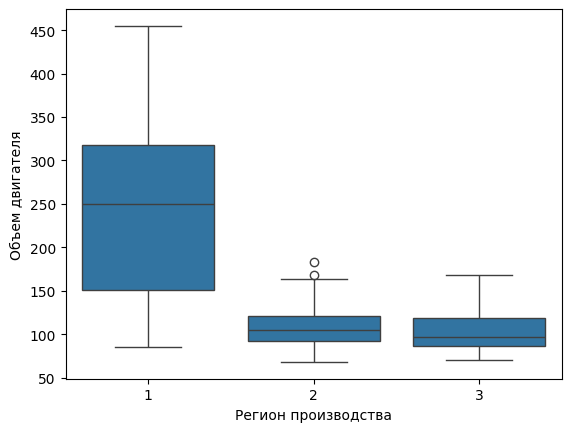

In [37]:
sns.boxplot(data=df, x='origin', y='displacement')
plt.xlabel('Регион производства')
plt.ylabel('Объем двигателя')
plt.show()

In [38]:
for country in (1,2,3):
  print(stats.shapiro(df.loc[df['origin'] == country,'displacement']))

ShapiroResult(statistic=np.float64(0.9553500085042292), pvalue=np.float64(5.953639021022188e-07))
ShapiroResult(statistic=np.float64(0.9175616070269395), pvalue=np.float64(0.00020623617340964883))
ShapiroResult(statistic=np.float64(0.920927846993032), pvalue=np.float64(0.00011616691084258716))


Все выборки не являются нормальными. 3 группы, независимые, поэтому применяем критерий Краскала-Уоллиса

In [39]:
stats.kruskal(df.loc[df['origin'] == 1,'displacement'],
              df.loc[df['origin'] == 2,'displacement'],
              df.loc[df['origin'] == 3,'displacement'])

KruskalResult(statistic=np.float64(203.6011279462967), pvalue=np.float64(6.145777198480783e-45))

Отвергаем нулевую гипотезу о равенстве медианных значений

Проверим отдельно медианные значения у групп 2 и 3. Так как групп 2, то используем критерий Манна-Уитни

In [40]:
stats.mannwhitneyu(
              df.loc[df['origin'] == 2,'displacement'],
              df.loc[df['origin'] == 3,'displacement'])

MannwhitneyuResult(statistic=np.float64(3324.5), pvalue=np.float64(0.03312189413598769))

Отвергаем нулевую гипотезу о равенстве медианных значений

### horsepower/origin

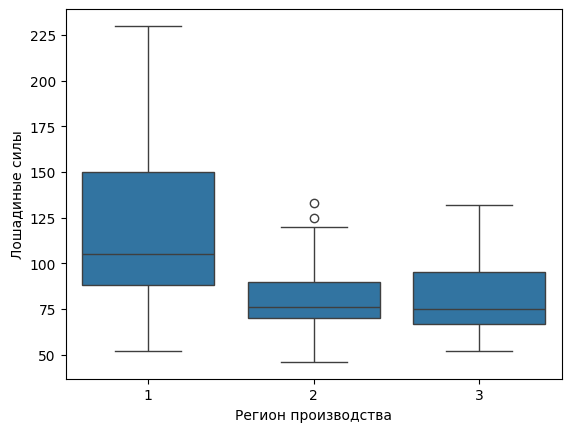

In [41]:
sns.boxplot(data=df, x='origin', y='horsepower')
plt.xlabel('Регион производства')
plt.ylabel('Лошадиные силы')
plt.show()

In [42]:
for country in (1,2,3):
  print(stats.shapiro(df.loc[df['origin'] == country,'horsepower']))

ShapiroResult(statistic=np.float64(0.9235299032885974), pvalue=np.float64(5.020742256258796e-10))
ShapiroResult(statistic=np.float64(0.957690947634027), pvalue=np.float64(0.01869905985175956))
ShapiroResult(statistic=np.float64(0.9243754813024518), pvalue=np.float64(0.00016959131923028286))


Все выборки не являются нормальными. 3 группы, независимые, поэтому применяем критерий Краскала-Уоллиса

In [43]:
stats.kruskal(df.loc[df['origin'] == 1,'horsepower'],
              df.loc[df['origin'] == 2,'horsepower'],
              df.loc[df['origin'] == 3,'horsepower'])

KruskalResult(statistic=np.float64(105.87106835567998), pvalue=np.float64(1.0242114106519452e-23))

Отвергаем нулевую гипотезу о равенстве медианных значений

Проверим отдельно медианные значения у групп 2 и 3. Так как групп 2, то используем критерий Манна-Уитни

In [44]:
stats.mannwhitneyu(
              df.loc[df['origin'] == 2,'horsepower'],
              df.loc[df['origin'] == 3,'horsepower'])

MannwhitneyuResult(statistic=np.float64(2935.5), pvalue=np.float64(0.5175191560305479))

Нет оснований отвергнуть нулевую гипотезу. Поэтому можно сказать, что машины из Юго-Восточной Азии и Европы имеют одинаковое медианное значение мощности

### weight/origin

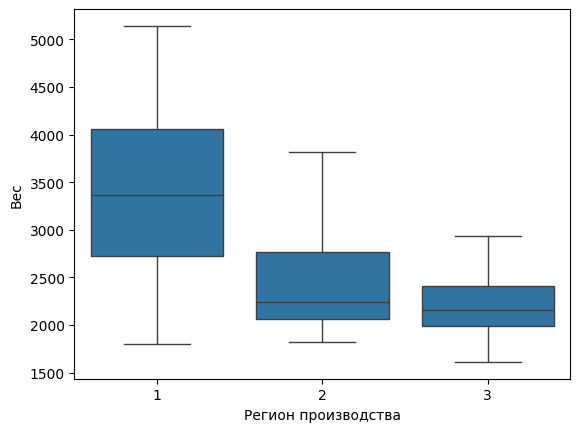

In [45]:
sns.boxplot(data=df, x='origin', y='weight')
plt.xlabel('Регион производства')
plt.ylabel('Вес')
plt.show()

In [46]:
for country in (1,2,3):
  print(stats.shapiro(df.loc[df['origin'] == country,'weight']))

ShapiroResult(statistic=np.float64(0.975878275683242), pvalue=np.float64(0.0003075496601729852))
ShapiroResult(statistic=np.float64(0.9106447564226953), pvalue=np.float64(0.00010479051537238255))
ShapiroResult(statistic=np.float64(0.9625361481811474), pvalue=np.float64(0.02040638023931727))


Все выборки не являются нормальными. 3 группы, независимые, поэтому применяем критерий Краскала-Уоллиса

In [47]:
stats.kruskal(df.loc[df['origin'] == 1,'weight'],
              df.loc[df['origin'] == 2,'weight'],
              df.loc[df['origin'] == 3,'weight'])

KruskalResult(statistic=np.float64(158.1879032137409), pvalue=np.float64(4.4661495889563906e-35))

Отвергаем нулевую гипотезу о равенстве медианных значений

Проверим отдельно медианные значения у групп 2 и 3. Так как групп 2, то используем критерий Манна-Уитни

In [48]:
stats.mannwhitneyu(
              df.loc[df['origin'] == 2,'weight'],
              df.loc[df['origin'] == 3,'weight'])

MannwhitneyuResult(statistic=np.float64(3320.5), pvalue=np.float64(0.0347715799741095))

Отвергаем нулевую гипотезу о равенстве медианных значений

### acceleration/origin

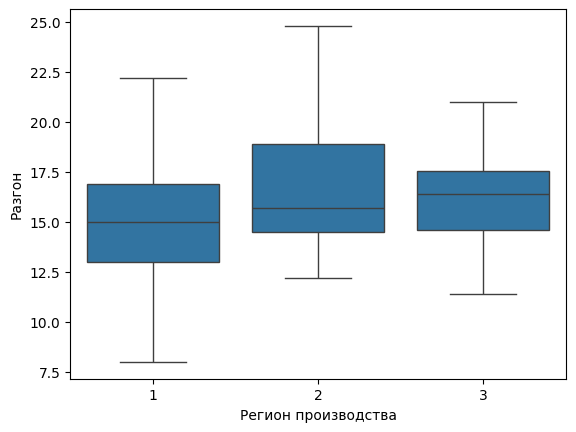

In [49]:
sns.boxplot(data=df, x='origin', y='acceleration')
plt.xlabel('Регион производства')
plt.ylabel('Разгон')
plt.show()

In [50]:
for country in (1,2,3):
  print(stats.shapiro(df.loc[df['origin'] == country,'acceleration']))

ShapiroResult(statistic=np.float64(0.9953619132173802), pvalue=np.float64(0.6592857811056919))
ShapiroResult(statistic=np.float64(0.901676633923096), pvalue=np.float64(4.517151258253322e-05))
ShapiroResult(statistic=np.float64(0.9857600160350737), pvalue=np.float64(0.5289272458594274))


1 и 3 выборка являются нормальными, но 2я нет. 3 группы, независимые, поэтому применяем критерий Краскала-Уоллиса

In [51]:
stats.kruskal(df.loc[df['origin'] == 1,'acceleration'],
              df.loc[df['origin'] == 2,'acceleration'],
              df.loc[df['origin'] == 3,'acceleration'])

KruskalResult(statistic=np.float64(21.092800117272393), pvalue=np.float64(2.628794579507175e-05))

Отвергаем нулевую гипотезу о равенстве медианных значений

### cylinders/origin

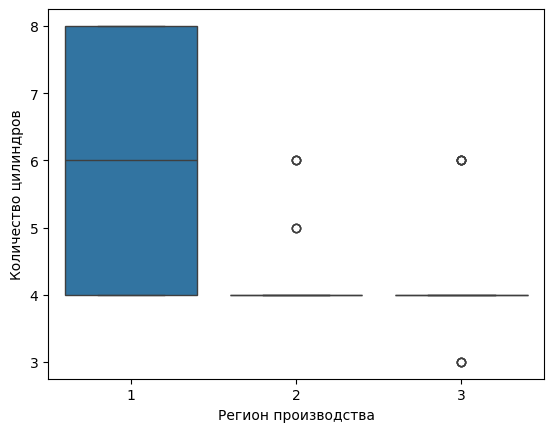

In [52]:
sns.boxplot(data=df, x='origin', y='cylinders')
plt.xlabel('Регион производства')
plt.ylabel('Количество цилиндров')
plt.show()

В США разнообразие автомобилей с различным количеством цилиндров большое, а в других регионах - нет

Проверка на нормальность выборок

In [53]:
for country in (1,2,3):
  print(stats.shapiro(df.loc[df['origin'] == country,'cylinders']))

ShapiroResult(statistic=np.float64(0.77806786462093), pvalue=np.float64(4.455828637609409e-18))
ShapiroResult(statistic=np.float64(0.3426322118105174), pvalue=np.float64(4.245742291236368e-16))
ShapiroResult(statistic=np.float64(0.4438600021398402), pvalue=np.float64(9.172480850044e-16))


Все выборки не являются нормальными. 3 группы, независимые, поэтому применяем критерий Краскала-Уоллиса

In [54]:
stats.kruskal(df.loc[df['origin'] == 1,'cylinders'],
              df.loc[df['origin'] == 2,'cylinders'],
              df.loc[df['origin'] == 3,'cylinders'])

KruskalResult(statistic=np.float64(151.0166773350403), pvalue=np.float64(1.611184143132911e-33))

Отвергаем нулевую гипотезу о равенстве медианных значений

Проверим отдельно медианные значения у групп 2 и 3. Так как групп 2, то используем критерий Манна-Уитни

In [55]:
stats.mannwhitneyu(
              df.loc[df['origin'] == 2,'cylinders'],
              df.loc[df['origin'] == 3,'cylinders'])

MannwhitneyuResult(statistic=np.float64(2948.5), pvalue=np.float64(0.20710274923631689))

Нет оснований отвергнуть нулевую гипотезу. В Юго-Восточной Азии и Европе одинаковое медианное количество цилиндров - 4.

## Корреляционный анализ

Проведём корреляционный анализ взаимосвязи количественных признаков с помощью коэффциента корреляции Пирсона.

In [56]:
number_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

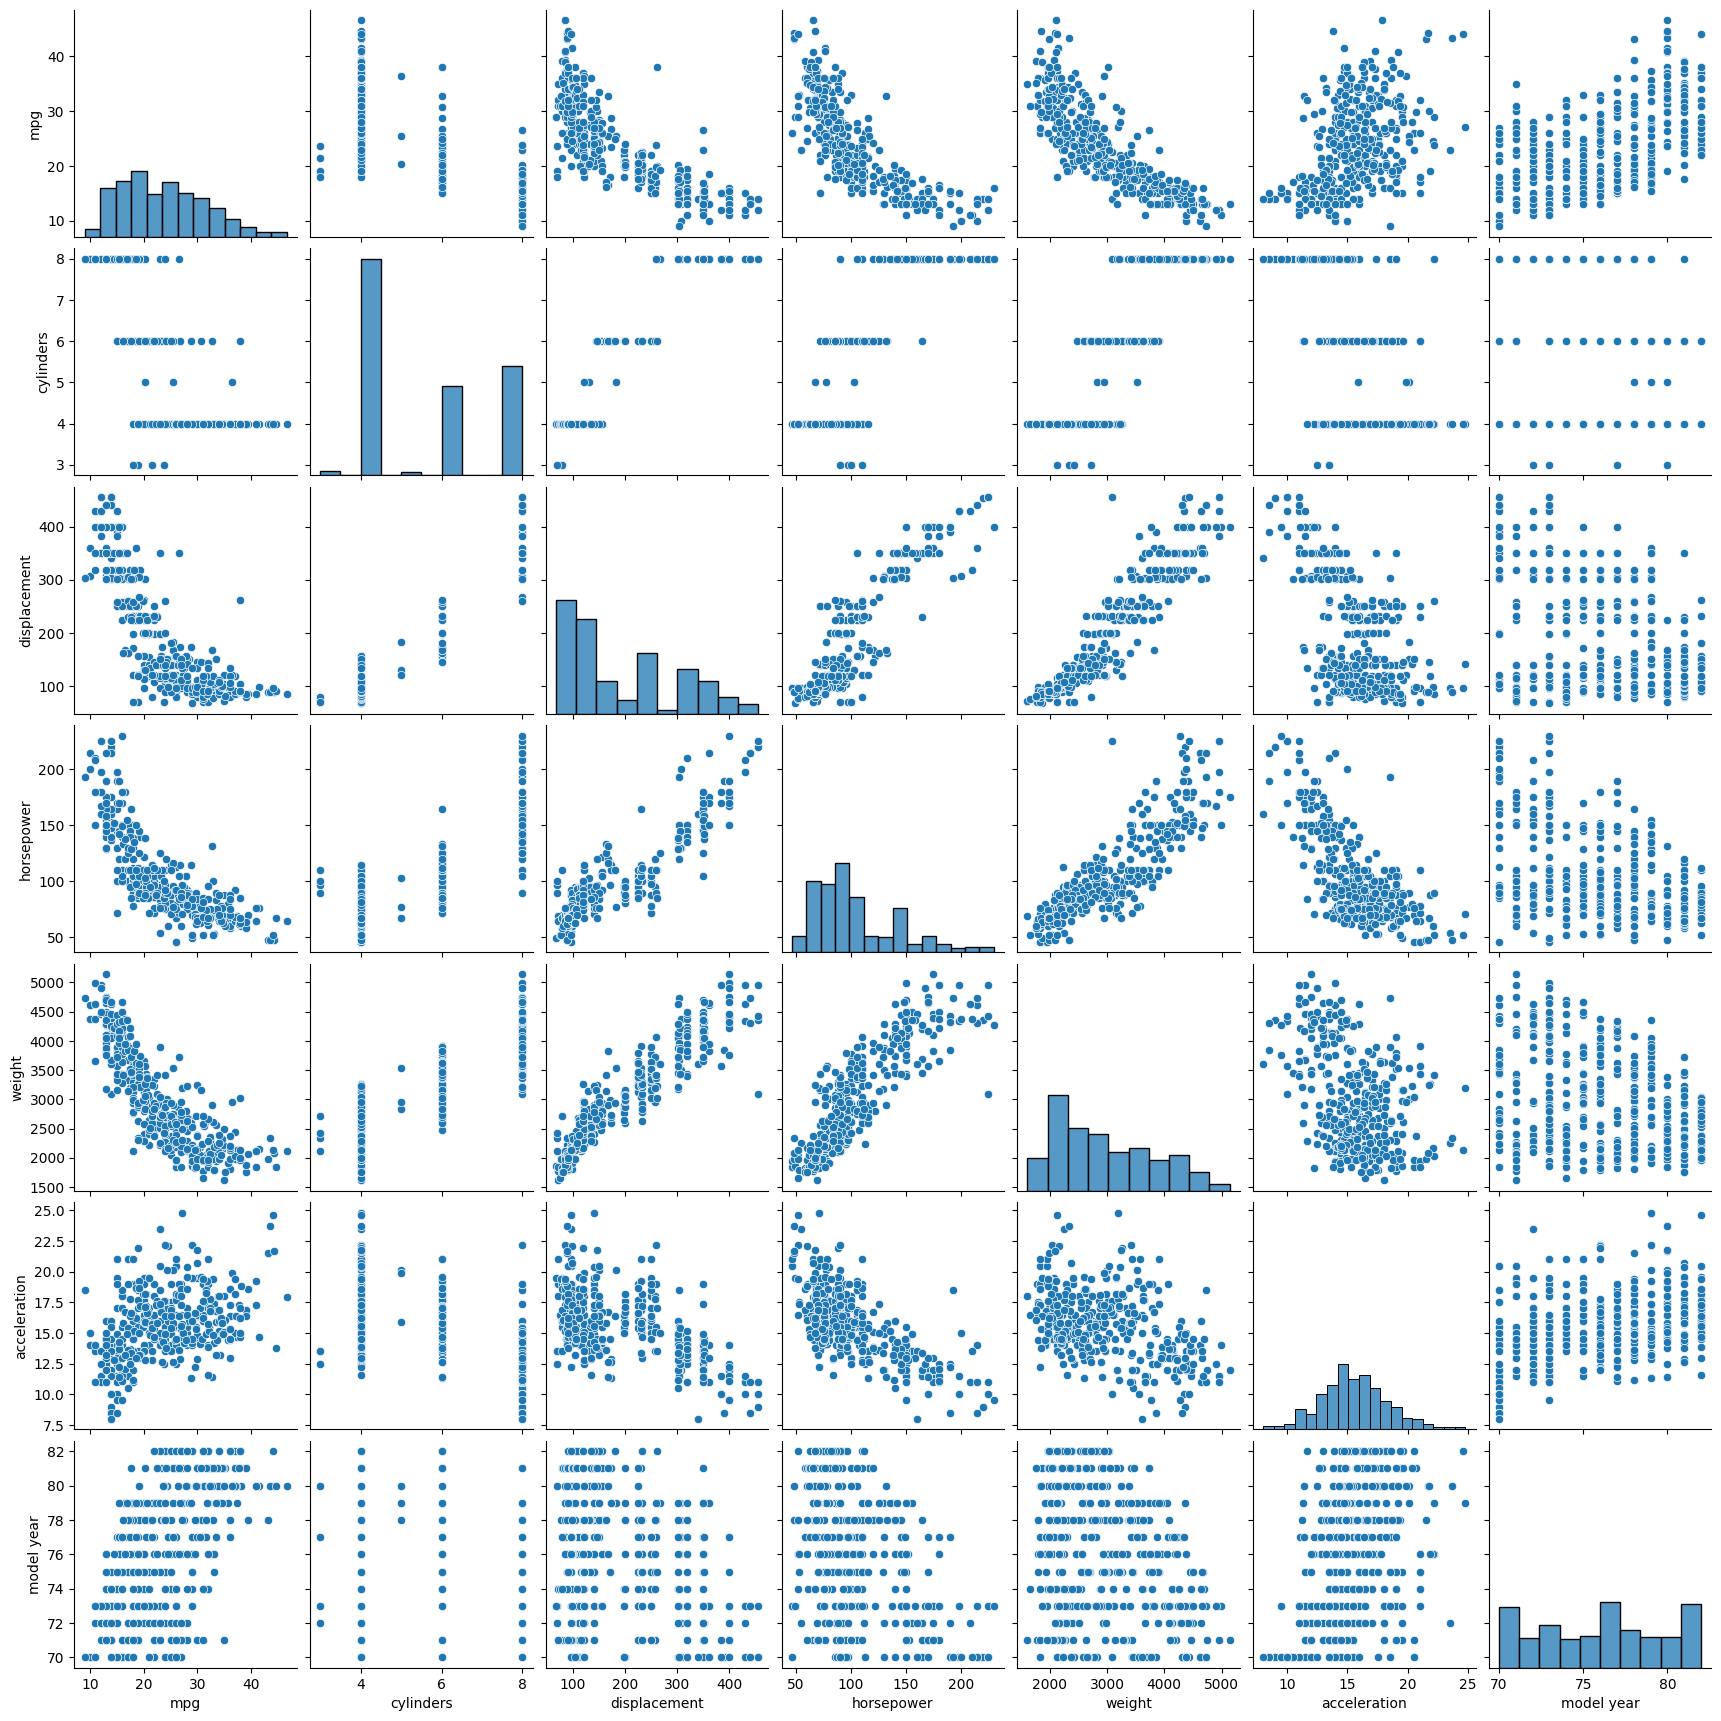

In [57]:
sns.pairplot(df[number_cols])

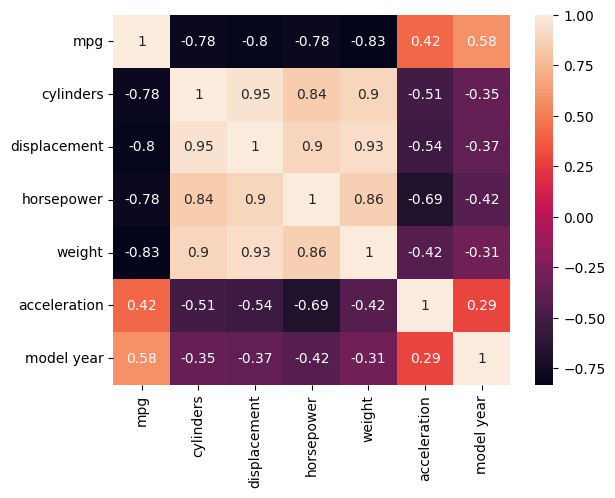

In [58]:
sns.heatmap(df[number_cols].corr(method='pearson'),annot=True);

Определим для каждого коэффцииента p-value

In [59]:
def calculate_pvalues(df, method):
    n = df.shape[1]
    p_values = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
              corr, p_value = stats.pearsonr(df.iloc[:, i], df.iloc[:, j]) if method == 'p' else stats.spearmanr(df.iloc[:, i], df.iloc[:, j])
              p_values[i, j] = p_value
    return p_values

In [60]:
p_values_pearson = calculate_pvalues(df[number_cols], method='p')
p_values_df = pd.DataFrame(p_values_pearson, index=df[number_cols].columns, columns=df[number_cols].columns)

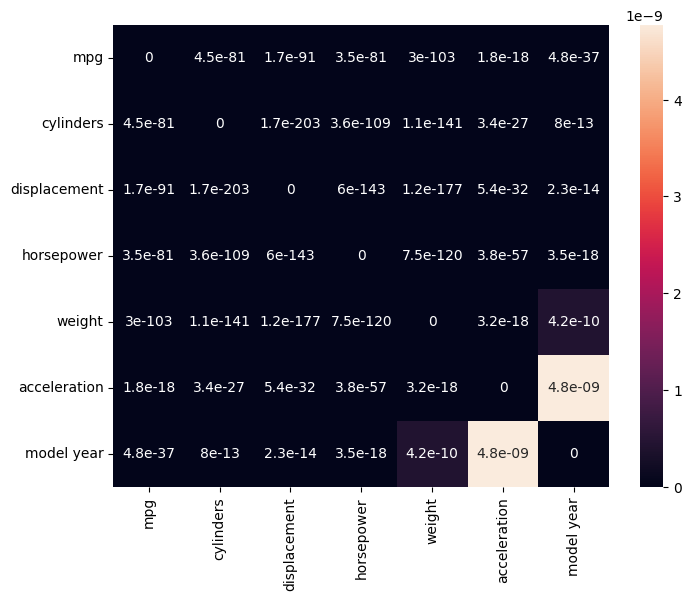

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(p_values_df,annot=True)
plt.show()

Значения p-value во всех ячейках меньше 0.05, значит во всех парах отклоняем нулевую гипотезу о равенстве нулю коэффициента корреляции Пирсона. Есть корреляция

Самая сильная корреляция наблюдается между cylinders и displacement. Также есть сильная связь между cylinders/weight и weight/displacement, horsepower/weight, horsepower/cylinders. Это положительная корреляция. Есть ещё отрицательная корреляция между mpg/cylinders, mpg/displacement, mpg/horsepower, mpg/weight, acceleration/horsepower

Найдём аналогично коэффициент корреляции Спирмена

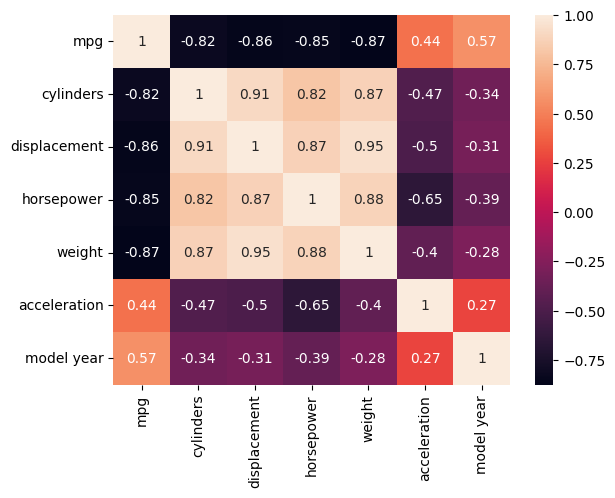

In [62]:
sns.heatmap(df[number_cols].corr(method='spearman'),annot=True);

Значения коэффициентов корреляции Спирмена близки к значениям коэффициентов корреляции Пирсона.

In [63]:
p_values_spearman = calculate_pvalues(df[number_cols], method='s')
p_values_df = pd.DataFrame(p_values_spearman, index=df[number_cols].columns, columns=df[number_cols].columns)

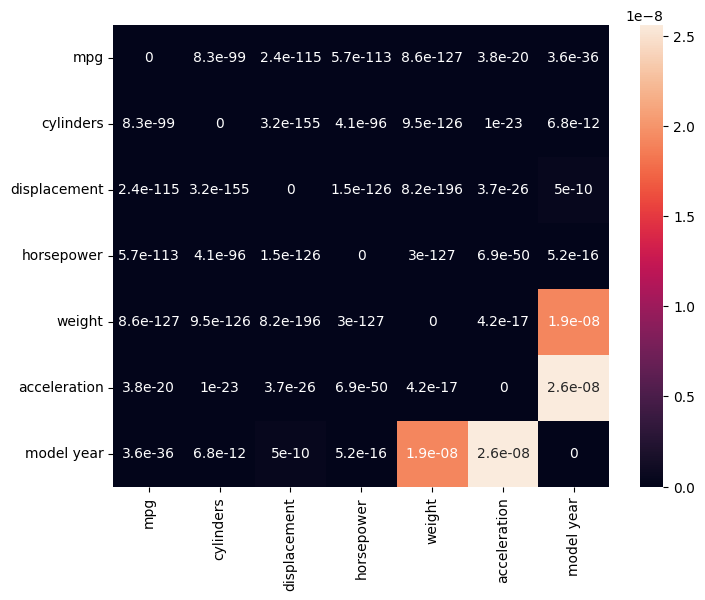

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(p_values_df,annot=True)
plt.show()

Как и в случае корреляции Пирсона, во всех парах результат статистически значим. Нулевую гипотезу о равенстве коэффициента корелляции нулю отклоняем.

Так как категориальные данные - регион и название машины, а названий машин очень много, то смысла строить таблицу сопряженности нет.

# Регрессионный анализ

## Линейная регрессия

Построим сначала модель линейной регресии. В качестве целевого показателя используем mpg. В качестве объясняющих факторов используем displacement, acceleration, model year, origin. Факторы cylinders, horsepower, weight не используются, так как между ними и фактором displacement есть сильная корреляция, которая приведёт к мультиколлинеарности. Также нужно преобразовать категориальный признак origin к виду, для использования в регрессии.

In [65]:
df_regression = pd.get_dummies(df, columns=['origin'], prefix='origin', drop_first=True, dtype=int)
df_regression = df_regression.rename(columns={'model year':'model_year'})

Также отмасштабируем данные, чтобы они имели одинаковый масштаб

In [66]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_regression[['displacement', 'acceleration', 'model_year']])

In [67]:
df_regression[['displacement', 'acceleration', 'model_year']] = x_scaled

Для наглядности построим сначала модель только с одним фактором displacement. Потом добавим другие факторы

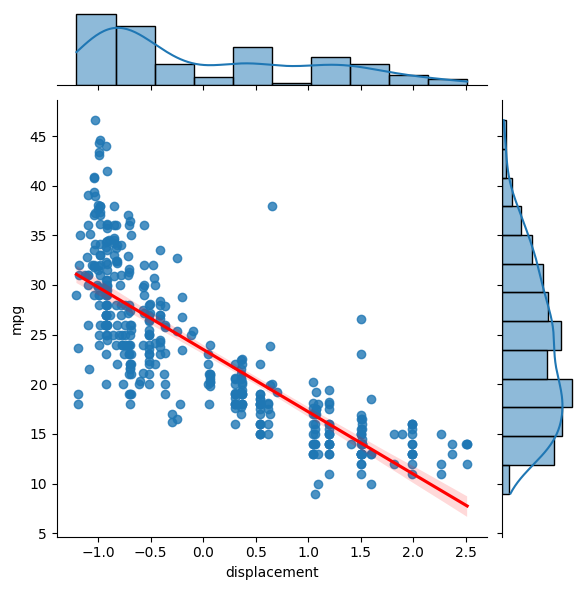

In [68]:
sns.jointplot(x = 'displacement', y = 'mpg', data=df_regression, kind="reg", line_kws={'color': 'red'})
plt.show()

In [69]:
Y1=df_regression['mpg']
X1=df_regression['displacement']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
model_linear1 = sm.OLS(Y1_train, sm.add_constant(X1_train)).fit()

In [70]:
model_linear1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     557.7
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           9.18e-72
Time:                        18:50:56   Log-Likelihood:                -941.27
No. Observations:                 318   AIC:                             1887.
Df Residuals:                     316   BIC:                             1894.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.4766      0.263     89.364      0.000      22.960      23.993
displacement    -6.2942      0.267    -23.616      0.000      -6.819      -5.770
==============================================================================
Omnibus:                       40.972   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.280
Skew:                           0.776   Prob(JB):                     4.05e-15
Kurtosis:                       4.611   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Нулевую гипотезу о равенстве коэффцициента регрессии нулю отвергаем. Также отвергаем нулевую гипотезу о равенстве нулю коэффициента детерминации. $R^2=0.64$. Нулевую гипотезу о нормальном распределении остатков отвергаем, ассиметрия положительна, эксцесс отличается от 3. Автокорреляции нет, так как коэффициеннт ДБ почти 2

Оценим качество модели

In [71]:
Y1_train_pred=model_linear1.predict(sm.add_constant(X1_train))
Y1_test_pred=model_linear1.predict(sm.add_constant(X1_test))

In [72]:
QualityMetrics=['R2 train','R2 test', 'MSE train','MSE test']
Models=pd.DataFrame(index=QualityMetrics)

In [73]:
Models.loc[QualityMetrics,'LinearRegressor: 1 variable']=[r2_score(Y1_train,Y1_train_pred),
                                             r2_score(Y1_test,Y1_test_pred),
                                             mean_squared_error(Y1_train,Y1_train_pred),
                                             mean_squared_error(Y1_test,Y1_test_pred)]
Models

,LinearRegressor: 1 variable
R2 train,0.638325
R2 test,0.677994
MSE train,21.803155
MSE test,20.433638


Далее включим в модель остальные факторы

In [74]:
Y2=df_regression['mpg']
X2=df_regression[['displacement', 'acceleration', 'model_year', 'origin_2', 'origin_3']]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 1)
model_linear2 = sm.OLS(Y2_train, sm.add_constant(X2_train)).fit()

In [75]:
model_linear2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.05e-87
Time:                        18:50:56   Log-Likelihood:                -896.50
No. Observations:                 318   AIC:                             1805.
Df Residuals:                     312   BIC:                             1828.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.8440      0.335     68.174      0.000      22.185      23.503
displacement    -4.8039      0.378    -12.715      0.000      -5.547      -4.060
acceleration    -0.2223      0.278     -0.799      0.425      -0.770       0.325
model_year       2.7902      0.257     10.877      0.000       2.285       3.295
origin_2         1.4402      0.756      1.904      0.058      -0.048       2.928
origin_3         2.2257      0.739      3.013      0.003       0.772       3.679
==============================================================================
Omnibus:                       19.088   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.523
Skew:                           0.410   Prob(JB):                     3.88e-07
Kurtosis:                       4.248   Cond. No.                         5.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видно, что коэффициент при acceleration является статистически не значимым. То есть не отвергаем нулевую гипотезу о равенстве нулю соответствующего коэффициента. Поэтому мы должны перестроить модель, без учета фактора acceleration

In [76]:
Y3=df_regression['mpg']
X3=df_regression[['displacement', 'model_year', 'origin_2', 'origin_3']]
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.2, random_state = 2)
model_linear3 = sm.OLS(Y3_train, sm.add_constant(X3_train)).fit()

In [77]:
model_linear3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     213.3
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           4.74e-88
Time:                        18:50:56   Log-Likelihood:                -894.92
No. Observations:                 318   AIC:                             1800.
Df Residuals:                     313   BIC:                             1819.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.6486      0.319     71.077      0.000      22.022      23.276
displacement    -4.7092      0.324    -14.513      0.000      -5.348      -4.071
model_year       2.5574      0.252     10.150      0.000       2.062       3.053
origin_2         1.4620      0.743      1.969      0.050       0.001       2.923
origin_3         2.1399      0.714      2.996      0.003       0.734       3.545
==============================================================================
Omnibus:                       20.601   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.286
Skew:                           0.458   Prob(JB):                     2.65e-07
Kurtosis:                       4.203   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Все коэффициенты являются статистически значимыми. Нулевую гипотезу о равенстве нулю коэффициентов отклоняем. Также отклоняем гипотезу о равенстве нулю коэффициента детерминации, $R^2$ равен 0.73. Нулевую гипотезу о нормальном распределении остатков отвергаем. Коэффициенты ассимметрии и эксцесса отличаются от тех, что у нормального распределения. Коэффициент ДБ 1.85, автокорреляции практически нет.

Оценим качество модели

In [78]:
Y3_train_pred=model_linear3.predict(sm.add_constant(X3_train))
Y3_test_pred=model_linear3.predict(sm.add_constant(X3_test))

In [79]:
Models.loc[QualityMetrics,'LinearRegressor: several variables']=[r2_score(Y3_train,Y3_train_pred),
                                             r2_score(Y3_test,Y3_test_pred),
                                             mean_squared_error(Y3_train,Y3_train_pred),
                                             mean_squared_error(Y3_test,Y3_test_pred)]
Models

,LinearRegressor: 1 variable,LinearRegressor: several variables
R2 train,0.638325,0.731566
R2 test,0.677994,0.819798
MSE train,21.803155,16.289548
MSE test,20.433638,11.084438


## Полиномиальная регрессия

Рассмотрим полиномиальную регрессию 2й, 3й и 4й степени относительно displacement, также включим факторы model_year и origin.

In [80]:
Y4=df_regression['mpg']
X4=df_regression[['displacement', 'model_year', 'origin_2', 'origin_3']]
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size = 0.2, random_state = 3)
poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly2 = poly2.fit_transform(X4_train[['displacement']])
X_test_poly2 = poly2.transform(X4_test[['displacement']])

In [81]:
X4_train = pd.concat([pd.DataFrame(X_train_poly2, index=X4_train.index, columns=['d0', 'd1', 'd2']),
                      X4_train[['model_year', 'origin_2', 'origin_3']]], axis=1)
X4_test = pd.concat([pd.DataFrame(X_test_poly2, index=X4_test.index, columns=['d0', 'd1', 'd2']),
                      X4_test[['model_year', 'origin_2', 'origin_3']]], axis=1)

In [82]:
model_poly2 = sm.OLS(Y4_train, X4_train).fit()
model_poly2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     244.1
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          1.59e-105
Time:                        18:50:56   Log-Likelihood:                -850.66
No. Observations:                 318   AIC:                             1713.
Df Residuals:                     312   BIC:                             1736.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
d0            21.2726      0.331     64.305      0.000      20.622      21.924
d1            -6.7407      0.406    -16.603      0.000      -7.540      -5.942
d2             2.1863      0.258      8.484      0.000       1.679       2.693
model_year     2.7923      0.228     12.269      0.000       2.344       3.240
origin_2      -0.4500      0.703     -0.640      0.523      -1.834       0.934
origin_3       0.5356      0.737      0.727      0.468      -0.914       1.985
==============================================================================
Omnibus:                       35.969   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.706
Skew:                           0.447   Prob(JB):                     1.24e-25
Kurtosis:                       5.803   Cond. No.                         9.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициенты origin являются статистически незначимыми, не отвергаем нулевую гипотезу о равенстве нулю коэффициентов. Поэтому нужно перестроить модель без учета фактора origin

In [83]:
Y5=df_regression['mpg']
X5=df_regression[['displacement', 'model_year']]
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size = 0.2, random_state = 4)
poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly2 = poly2.fit_transform(X5_train[['displacement']])
X_test_poly2 = poly2.transform(X5_test[['displacement']])

In [84]:
X5_train = pd.concat([pd.DataFrame(X_train_poly2, index=X5_train.index, columns=['d0', 'd1', 'd2']),
                      X5_train[['model_year']]], axis=1)
X5_test = pd.concat([pd.DataFrame(X_test_poly2, index=X5_test.index, columns=['d0', 'd1', 'd2']),
                      X5_test[['model_year']]], axis=1)

In [85]:
model_poly2 = sm.OLS(Y5_train, X5_train).fit()
model_poly2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     380.0
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          3.94e-104
Time:                        18:50:56   Log-Likelihood:                -858.74
No. Observations:                 318   AIC:                             1725.
Df Residuals:                     314   BIC:                             1741.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
d0            21.2224      0.318     66.799      0.000      20.597      21.848
d1            -6.7411      0.270    -24.973      0.000      -7.272      -6.210
d2             2.2261      0.240      9.256      0.000       1.753       2.699
model_year     2.8218      0.218     12.965      0.000       2.394       3.250
==============================================================================
Omnibus:                       27.325   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.616
Skew:                           0.336   Prob(JB):                     1.40e-17
Kurtosis:                       5.325   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Все коэффициенты являются статистически значимыми. Нулевую гипотезу о равенстве нулю коэффициентов отклоняем. Также отклоняем гипотезу о равенстве нулю коэффициента детерминации, $R^2$ равен 0.78. Нулевую гипотезу о нормальном распределении остатков отвергаем. Коэффициенты ассимметрии и эксцесса отличаются от тех, что у нормального распределения. Коэффициент ДБ 1.95, автокорреляции практически нет.

Оценим качество модели

In [86]:
Y5_train_pred=model_poly2.predict(X5_train)
Y5_test_pred=model_poly2.predict(X5_test)

In [87]:
Models.loc[QualityMetrics,'PolynomialRegressor: 2 deg']=[r2_score(Y5_train,Y5_train_pred),
                                             r2_score(Y5_test,Y5_test_pred),
                                             mean_squared_error(Y5_train,Y5_train_pred),
                                             mean_squared_error(Y5_test,Y5_test_pred)]
Models

,LinearRegressor: 1 variable,LinearRegressor: several variables,PolynomialRegressor: 2 deg
R2 train,0.638325,0.731566,0.784042
R2 test,0.677994,0.819798,0.865419
MSE train,21.803155,16.289548,12.974836
MSE test,20.433638,11.084438,8.656052


Теперь рассмотрим полиномиальную регрессию 3й степени

In [88]:
Y6=df_regression['mpg']
X6=df_regression[['displacement', 'model_year']]
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, Y6, test_size = 0.2, random_state = 5)
poly3 = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly3 = poly3.fit_transform(X6_train[['displacement']])
X_test_poly3 = poly3.transform(X6_test[['displacement']])

In [89]:
X6_train = pd.concat([pd.DataFrame(X_train_poly3, index=X6_train.index, columns=['d0', 'd1', 'd2', 'd3']),
                      X6_train[['model_year']]], axis=1)
X6_test = pd.concat([pd.DataFrame(X_test_poly3, index=X6_test.index, columns=['d0', 'd1', 'd2', 'd3']),
                      X6_test[['model_year']]], axis=1)

In [90]:
model_poly3 = sm.OLS(Y6_train, X6_train).fit()
model_poly3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     318.2
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          6.49e-109
Time:                        18:50:56   Log-Likelihood:                -846.57
No. Observations:                 318   AIC:                             1703.
Df Residuals:                     313   BIC:                             1722.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
d0            20.6420      0.369     55.938      0.000      19.916      21.368
d1            -6.2323      0.365    -17.060      0.000      -6.951      -5.514
d2             3.1707      0.442      7.178      0.000       2.302       4.040
d3            -0.5306      0.229     -2.315      0.021      -0.982      -0.080
model_year     2.8882      0.215     13.430      0.000       2.465       3.311
==============================================================================
Omnibus:                       30.782   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.598
Skew:                           0.304   Prob(JB):                     1.59e-24
Kurtosis:                       5.811   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Все коэффициенты являются статистически значимыми. Нулевую гипотезу о равенстве нулю коэффициентов отклоняем. Также отклоняем гипотезу о равенстве нулю коэффициента детерминации, $R^2$ равен 0.8. Нулевую гипотезу о нормальном распределении остатков отвергаем. Коэффициенты ассимметрии и эксцесса отличаются от тех, что у нормального распределения. Коэффициент ДБ 1.87, автокорреляции практически нет.

Оценим качество модели

In [91]:
Y6_train_pred=model_poly3.predict(X6_train)
Y6_test_pred=model_poly3.predict(X6_test)

In [92]:
Models.loc[QualityMetrics,'PolynomialRegressor: 3 deg']=[r2_score(Y6_train,Y6_train_pred),
                                             r2_score(Y6_test,Y6_test_pred),
                                             mean_squared_error(Y6_train,Y6_train_pred),
                                             mean_squared_error(Y6_test,Y6_test_pred)]
Models

,LinearRegressor: 1 variable,LinearRegressor: several variables,PolynomialRegressor: 2 deg,PolynomialRegressor: 3 deg
R2 train,0.638325,0.731566,0.784042,0.802636
R2 test,0.677994,0.819798,0.865419,0.809971
MSE train,21.803155,16.289548,12.974836,12.018623
MSE test,20.433638,11.084438,8.656052,11.269560


Теперь рассмотрим полиномиальную регрессию 4й степени

In [93]:
Y7=df_regression['mpg']
X7=df_regression[['displacement', 'model_year']]
X7_train, X7_test, Y7_train, Y7_test = train_test_split(X7, Y7, test_size = 0.2, random_state = 6)
poly4 = PolynomialFeatures(degree=4, include_bias=True)
X_train_poly4 = poly4.fit_transform(X7_train[['displacement']])
X_test_poly4 = poly4.transform(X7_test[['displacement']])

In [94]:
X7_train = pd.concat([pd.DataFrame(X_train_poly4, index=X7_train.index, columns=['d0', 'd1', 'd2', 'd3', 'd4']),
                      X7_train[['model_year']]], axis=1)
X7_test = pd.concat([pd.DataFrame(X_test_poly4, index=X7_test.index, columns=['d0', 'd1', 'd2', 'd3', 'd4']),
                      X7_test[['model_year']]], axis=1)

In [95]:
model_poly4 = sm.OLS(Y7_train, X7_train).fit()
model_poly4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     247.2
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          3.28e-106
Time:                        18:50:57   Log-Likelihood:                -841.92
No. Observations:                 318   AIC:                             1696.
Df Residuals:                     312   BIC:                             1718.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
d0            20.9605      0.372     56.275      0.000      20.228      21.693
d1            -5.0443      0.677     -7.456      0.000      -6.375      -3.713
d2             2.6436      0.493      5.367      0.000       1.674       3.613
d3            -1.5204      0.597     -2.548      0.011      -2.695      -0.346
d4             0.4385      0.242      1.810      0.071      -0.038       0.915
model_year     2.8747      0.210     13.709      0.000       2.462       3.287
==============================================================================
Omnibus:                       28.515   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.942
Skew:                          -0.053   Prob(JB):                     2.72e-28
Kurtosis:                       6.093   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент при d4 уже статистически незначим. Поэтому нулевую гипотезу о равенстве нулю коэффициента не отклоняем. Значит 4ю степень полинома уже нет смысла включать в регрессию. Таким образом, оптимальная степень полинома - третья.

## Дерево решений

Рассмотрим регрессию с помощью дерева решений.

In [96]:
Y8=df['mpg']
X8=df[['displacement', 'acceleration', 'model year', 'origin','cylinders','horsepower','weight']]
X8_train, X8_test, Y8_train, Y8_test = train_test_split(X8, Y8, test_size = 0.2, random_state = 42)

Рассмотрим деревья с разными значениями max_depth: 2,3,4,5,7 и min_samples_leaf: 3, 5, 10, 20. Чтобы найти наилучшее значение

In [97]:
max_depth_params = [2, 3, 4, 5, 7]
min_samples_leaf_params = [3, 5, 10, 20]

In [98]:
TreeModels=pd.DataFrame(index=QualityMetrics)

In [99]:
for max_depth in max_depth_params:
  for min_samples_leaf in min_samples_leaf_params:
    model_tree = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    model_tree_fit = model_tree.fit(X8_train, Y8_train)
    Y8_train_pred=model_tree_fit.predict(X8_train)
    Y8_test_pred=model_tree_fit.predict(X8_test)
    TreeModels.loc[QualityMetrics,f'Decision Tree: depth={max_depth}, min_leaf={min_samples_leaf}']=[r2_score(Y8_train,Y8_train_pred),
                                                r2_score(Y8_test,Y8_test_pred),
                                                mean_squared_error(Y8_train,Y8_train_pred),
                                                mean_squared_error(Y8_test,Y8_test_pred)]
TreeModels

,"Decision Tree: depth=2, min_leaf=3","Decision Tree: depth=2, min_leaf=5","Decision Tree: depth=2, min_leaf=10","Decision Tree: depth=2, min_leaf=20","Decision Tree: depth=3, min_leaf=3","Decision Tree: depth=3, min_leaf=5","Decision Tree: depth=3, min_leaf=10","Decision Tree: depth=3, min_leaf=20","Decision Tree: depth=4, min_leaf=3","Decision Tree: depth=4, min_leaf=5","Decision Tree: depth=4, min_leaf=10","Decision Tree: depth=4, min_leaf=20","Decision Tree: depth=5, min_leaf=3","Decision Tree: depth=5, min_leaf=5","Decision Tree: depth=5, min_leaf=10","Decision Tree: depth=5, min_leaf=20","Decision Tree: depth=7, min_leaf=3","Decision Tree: depth=7, min_leaf=5","Decision Tree: depth=7, min_leaf=10","Decision Tree: depth=7, min_leaf=20"
R2 train,0.731715,0.731715,0.731715,0.731715,0.816475,0.816475,0.815060,0.814179,0.878245,0.878245,0.875588,0.858134,0.907822,0.904538,0.890577,0.862144,0.937985,0.930934,0.899435,0.862144
R2 test,0.687687,0.687687,0.687687,0.687687,0.811061,0.811061,0.803581,0.799847,0.853534,0.853534,0.858558,0.849053,0.853696,0.841389,0.855379,0.854699,0.863153,0.839349,0.842495,0.854699
MSE train,16.820456,16.820456,16.820456,16.820456,11.506321,11.506321,11.595030,11.650290,7.633572,7.633572,7.800187,8.894458,5.779190,5.985118,6.860403,8.643080,3.888084,4.330208,6.305027,8.643080
MSE test,16.791942,16.791942,16.791942,16.791942,10.158575,10.158575,10.560769,10.761506,7.874947,7.874947,7.604821,8.115891,7.866255,8.527949,7.775741,7.812321,7.357753,8.637618,8.468506,7.812321


Оптимальные значения: max_depth=4, min_samples_leaf=3

In [100]:
model_tree_best = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, random_state=42)
model_tree_fit = model_tree_best.fit(X8_train, Y8_train)
Y8_train_pred=model_tree_fit.predict(X8_train)
Y8_test_pred=model_tree_fit.predict(X8_test)
Models.loc[QualityMetrics,f'Decision Tree: depth={5}, min_leaf={3}']=[r2_score(Y8_train,Y8_train_pred),
                                            r2_score(Y8_test,Y8_test_pred),
                                            mean_squared_error(Y8_train,Y8_train_pred),
                                            mean_squared_error(Y8_test,Y8_test_pred)]

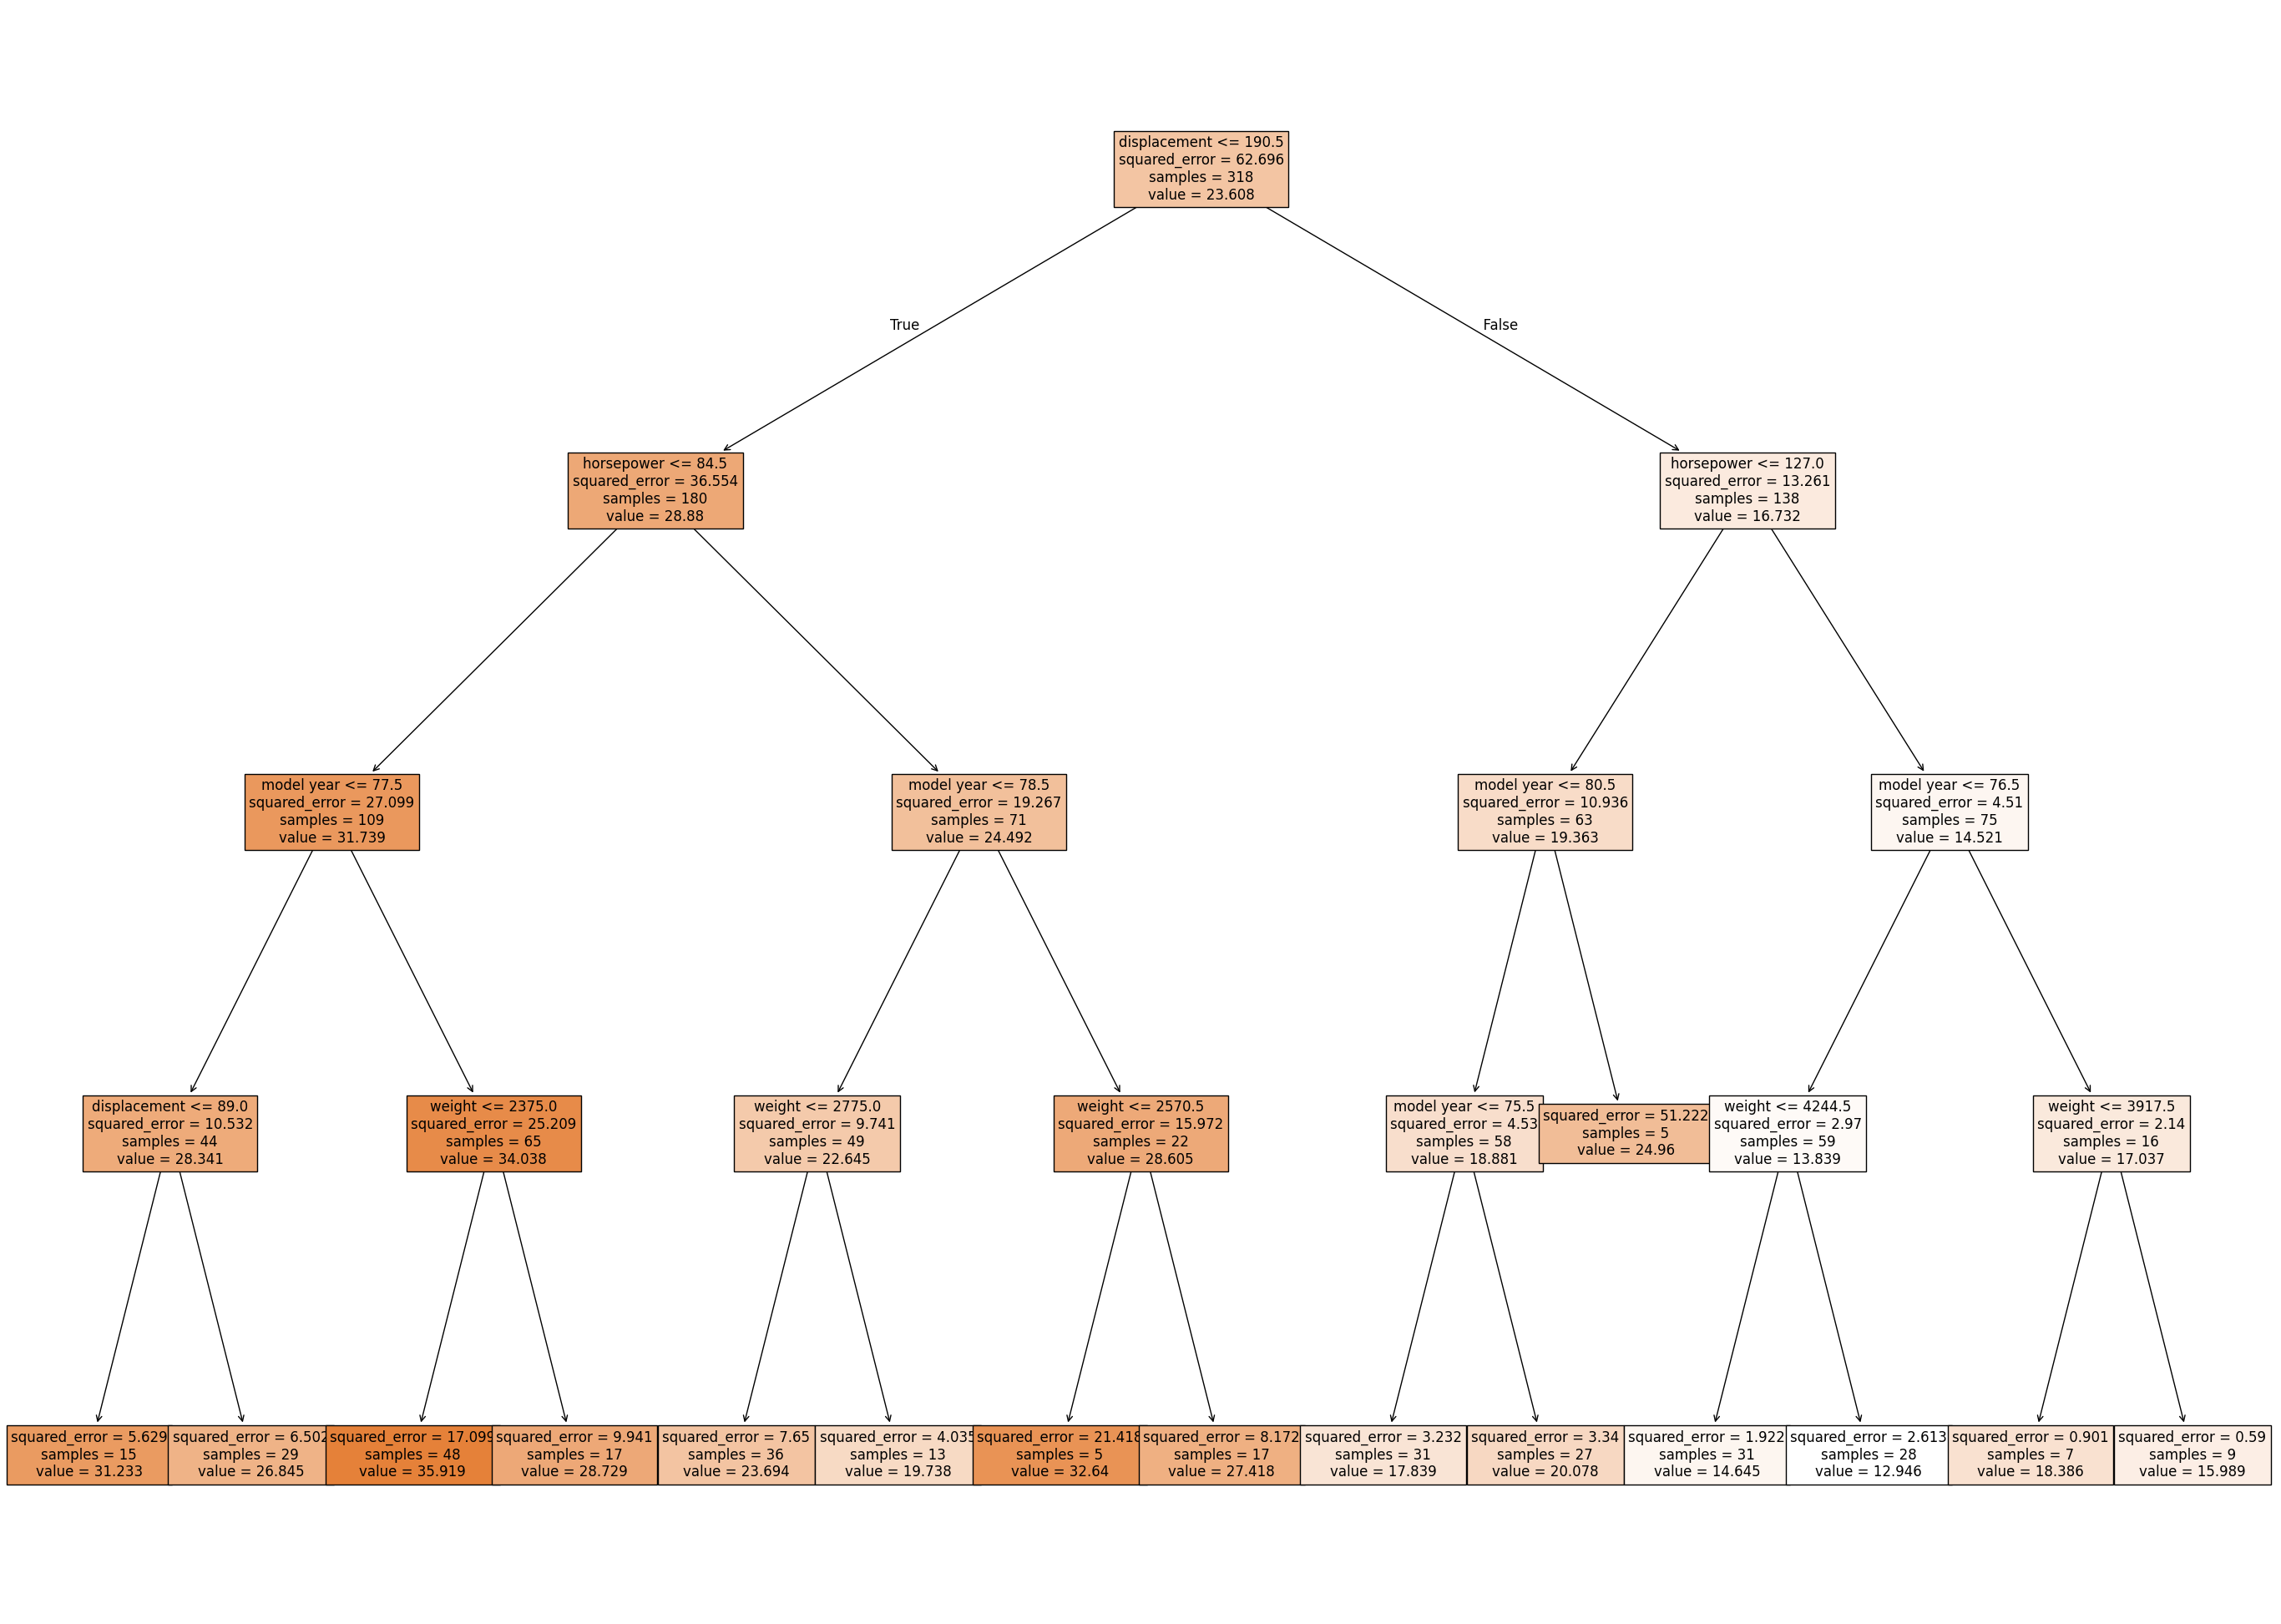

In [101]:
plt.figure(figsize=(35,25))
tree.plot_tree(model_tree_fit,feature_names=X8_train.columns, fontsize=12,filled=True)
plt.show()

In [102]:
Models

,LinearRegressor: 1 variable,LinearRegressor: several variables,PolynomialRegressor: 2 deg,PolynomialRegressor: 3 deg,"Decision Tree: depth=5, min_leaf=3"
R2 train,0.638325,0.731566,0.784042,0.802636,0.878245
R2 test,0.677994,0.819798,0.865419,0.809971,0.853534
MSE train,21.803155,16.289548,12.974836,12.018623,7.633572
MSE test,20.433638,11.084438,8.656052,11.269560,7.874947


Проанализируем построенные модели регресии. Линейная регрессия с несколькими переменными получилась лучше, чем с одной переменной. Причём в обоих случаях на тестовых данных результаты лучше, чем на обучающих, что говорит о недообучении. Модель с полиномиальной регрессиией показала себя лучше. Модель 3й степени показала довольно хорошие результаты с примерно одинаковым результатом на обучающих и тестовых данных, что говорит об оптимальном обучении модели. Немного лучше показала себя модель дерева решений. С помощью подбора параметров max_depth и min_samples_leaf был достигнут оптимальный результат, где нет проблемы с переобучением, которая часто присуща деревам решений. Таким образом самой лучшей моделью оказалось дерево решений.

# Прогноз

Рассмотрим машину со следующими параметрами

In [103]:
new_car_orig = pd.DataFrame(np.array([[4, 130, 100, 2400, 13, 79, 0, 1, 0,2]]), columns=df_regression.columns[1:].to_list()+['origin'])
new_car_orig

,cylinders,displacement,horsepower,weight,acceleration,model_year,car name,origin_2,origin_3,origin
0,4,130,100,2400,13,79,0,1,0,2


In [104]:
new_car = new_car_orig.copy()
new_car[['displacement', 'acceleration', 'model_year']] = scaler.transform(new_car_orig[['displacement', 'acceleration', 'model_year']])
new_car['const'] = 1.0
new_car

,cylinders,displacement,horsepower,weight,acceleration,model_year,car name,origin_2,origin_3,origin,const
0,4,-0.609052,100,2400,-0.932419,0.809631,0,1,0,2,1.0


In [105]:
Models.loc['Forecast', 'LinearRegressor: 1 variable']=model_linear1.predict(new_car[['const','displacement']])[0]
Models.loc['Forecast', 'LinearRegressor: several variables']=model_linear3.predict(new_car[['const','displacement', 'model_year', 'origin_2', 'origin_3']])[0]
Models.loc['Forecast', 'PolynomialRegressor: 2 deg']=model_poly2.predict(pd.concat([pd.DataFrame(poly2.transform(new_car[['displacement']]), index=new_car.index, columns=['d0', 'd1', 'd2']),
                      new_car[['model_year']]], axis=1))[0]
Models.loc['Forecast', 'PolynomialRegressor: 3 deg']=model_poly3.predict(pd.concat([pd.DataFrame(poly3.transform(new_car[['displacement']]), index=new_car.index, columns=['d0', 'd1', 'd2', 'd3']),
                      new_car[['model_year']]], axis=1))[0]
Models.loc['Forecast', 'Decision Tree: depth=5, min_leaf=3']=model_tree_fit.predict(new_car_orig[['displacement', 'acceleration', 'model_year', 'origin','cylinders','horsepower','weight']].rename(columns={'model_year': 'model year'}))[0]

In [106]:
Models

,LinearRegressor: 1 variable,LinearRegressor: several variables,PolynomialRegressor: 2 deg,PolynomialRegressor: 3 deg,"Decision Tree: depth=5, min_leaf=3"
R2 train,0.638325,0.731566,0.784042,0.802636,0.878245
R2 test,0.677994,0.819798,0.865419,0.809971,0.853534
MSE train,21.803155,16.289548,12.974836,12.018623,7.633572
MSE test,20.433638,11.084438,8.656052,11.269560,7.874947
Forecast,27.310112,29.049283,28.438469,28.072265,32.640000


Между собой модели линейной регрессии и полиномиальной регрессии дали примерно один и тот же прогноз. Но модель дерева решений дала более завышенный прогноз. Возможно это связано с тем, что в параметрических моделях регрессии небольшое различие от типичных данных не сильно влияет на результат. Но для дерева решений, которое принимало во внимание кореллированные данные, изменение одних данных сильно повлияло на результат.